In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file1 = "Air quality Dataset(1001-1792).csv"
file2 = "Air quality Dataset.csv"

In [16]:
df1 = pd.read_csv(file1,index_col = 'id' , infer_datetime_format = True)
df2 = pd.read_csv(file2,index_col = 'id' , infer_datetime_format = True)

In [17]:
df1.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
id,,,,,,,,,,
1001,India,Maharashtra,Mumbai,"Bandra Kurla Complex, Mumbai - IITM",23-05-2022 04:00:00,SO2,10.0,28.0,21.0,NaN
1002,India,Maharashtra,Mumbai,"Bandra Kurla Complex, Mumbai - IITM",23-05-2022 04:00:00,CO,28.0,31.0,30.0,NaN
1003,India,Maharashtra,Mumbai,"Bandra Kurla Complex, Mumbai - IITM",23-05-2022 04:00:00,OZONE,18.0,42.0,20.0,NaN
1004,India,Maharashtra,Mumbai,"Borivali East, Mumbai - IITM",23-05-2022 04:00:00,PM2.5,18.0,82.0,41.0,NaN
1005,India,Maharashtra,Mumbai,"Borivali East, Mumbai - IITM",23-05-2022 04:00:00,PM10,36.0,139.0,75.0,NaN


In [18]:
df2.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
id,,,,,,,,,,
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",23-05-2022 04:00:00,PM2.5,21.0,77.0,46.0,NaN
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",23-05-2022 04:00:00,PM10,58.0,110.0,85.0,NaN
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",23-05-2022 04:00:00,NO2,6.0,12.0,8.0,NaN
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",23-05-2022 04:00:00,NH3,2.0,3.0,2.0,NaN
5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",23-05-2022 04:00:00,SO2,12.0,13.0,12.0,NaN


In [19]:
df = pd.concat([df2 , df1] ,axis = 0 )

In [20]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'pollutant_id',
       'pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_unit'],
      dtype='object')

In [21]:
df.isnull().sum()

country              0
state                0
city                 0
station              0
last_update          0
pollutant_id         0
pollutant_min      258
pollutant_max      258
pollutant_avg      258
pollutant_unit    1792
dtype: int64

In [22]:
df.pollutant_id.unique()

array(['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE'], dtype=object)

In [23]:
df[df.pollutant_min.isna()].city.unique()

array(['Naharlagun', 'Araria', 'Arrah', 'Aurangabad', 'Buxar', 'Chhapra',
       'Gaya', 'Manguraha', 'Motihari', 'Purnia', 'Rajgir', 'Delhi',
       'Ahmedabad', 'Gandhinagar', 'Ambala', 'Bahadurgarh', 'Ballabgarh',
       'Bhiwani', 'Dharuhera', 'Faridabad', 'Gurugram', 'Hisar', 'Jind',
       'Karnal', 'Narnaul', 'Panipat', 'Sirsa', 'Yamunanagar',
       'Bengaluru', 'Bidar', 'Chikkamagaluru', 'Gadag', 'Kolar',
       'Madikeri', 'Udupi', 'Yadgir', 'Kannur', 'Thiruvananthapuram',
       'Ujjain', 'Mumbai', 'Pune', 'Shillong', 'Aizawl', 'Brajrajnagar',
       'Talcher', 'Mandi Gobindgarh', 'Jaipur', 'Gangtok', 'Chennai',
       'Coimbatore', 'Hyderabad', 'Agartala', 'Ghaziabad', 'Jhansi',
       'Lucknow', 'Moradabad', 'Prayagraj', 'Dehradun'], dtype=object)

In [24]:
df.last_update.unique()

array(['23-05-2022 04:00:00'], dtype=object)

In [25]:
pollutants = df.pollutant_id.unique()

In [26]:
subDF = df[df['pollutant_id'] == 'NO2'].sort_values('pollutant_max' , ascending = False).head(5)

In [27]:
# Function can be further written concisely using loops
def plot_citites_with_min_max_avg_pollution( num_cities = 5):
    fig, ax = plt.subplots(nrows = 7 , ncols = 3 , figsize=(20,20))
    plt.subplots_adjust(hspace = 1)


    no2_min = ax[0,0]
    subDF = df[df['pollutant_id'] == 'NO2'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot ( ax = no2_min , x = subDF.city , y = subDF.pollutant_min , palette = "cool")
    no2_min.set_ylabel('Pollution Level' , fontsize = 14)
    no2_min.set_title('Cities with Least NO2 level ' , fontsize = 14)

    no2_max = ax[0,1]
    subDF = df[df['pollutant_id'] == 'NO2'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot ( ax =no2_max , x = subDF.city , y = subDF.pollutant_max  , palette = "hot")
    no2_max.set_title('Cities with Max NO2 level ' , fontsize = 14)

    no2_avg = ax[0,2]
    subDF = df[df['pollutant_id'] == 'NO2'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot ( ax =no2_avg ,  x = subDF.city , y = subDF.pollutant_avg)
    no2_avg.set_title('Cities with Average NO2 level ' , fontsize = 14)

    PM25_min = ax[1,0]
    subDF = df[df['pollutant_id'] == 'PM2.5'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    PM25_min.set_ylabel('Pollution Level' , fontsize = 14)
    sns.barplot ( ax =PM25_min , x = subDF.city , y = subDF.pollutant_min ,  palette = "cool" )
    PM25_min.set_title('Cities with Least PM25_min level ' , fontsize = 14)

    PM25_max = ax[1,1]
    subDF = df[df['pollutant_id'] == 'PM2.5'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot (ax =PM25_max ,  x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    PM25_max.set_title('Cities with MAX PM25_min level ' , fontsize = 14)


    PM25_avg = ax[1,2]
    subDF = df[df['pollutant_id'] == 'PM2.5'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot ( ax =PM25_avg , x = subDF.city , y = subDF.pollutant_avg)
    PM25_avg.set_title('Cities with AVG PM25_min level ' , fontsize = 14)


    PM10_min = ax[2,0]
    subDF = df[df['pollutant_id'] == 'PM10'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot ( ax =PM10_min , x = subDF.city , y = subDF.pollutant_min ,  palette = "cool")
    PM10_min.set_title('Cities with Least PM10 level ' , fontsize = 14)

    PM10_max = ax[2,1]
    subDF = df[df['pollutant_id'] == 'PM10'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot (ax =PM10_max , x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    PM10_max.set_title('Cities with MAX PM10 level ' , fontsize = 14)

    PM10_avg = ax[2,2]
    subDF = df[df['pollutant_id'] == 'PM10'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot (ax = PM10_avg ,  x = subDF.city , y = subDF.pollutant_avg)
    PM10_avg.set_title('Cities with Avg PM10 level ' , fontsize = 14)

    NH3_min = ax[3,0]
    subDF = df[df['pollutant_id'] == 'NH3'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot (ax =NH3_min, x = subDF.city , y = subDF.pollutant_min , palette = "cool")
    NH3_min.set_title('Cities with Least NH3 level ' , fontsize = 14)

    NH3_max = ax[3,1]
    subDF = df[df['pollutant_id'] == 'NH3'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot (  ax =NH3_max , x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    NH3_max.set_title('Cities with Max NH3 level ' , fontsize = 14)

    NH3_avg = ax[3,2]
    subDF = df[df['pollutant_id'] == 'NH3'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot ( ax =NH3_avg,  x = subDF.city , y = subDF.pollutant_avg)
    NH3_avg.set_title('Cities with Avg NH3 level ' , fontsize = 14)

    SO2_min = ax[4,0]
    subDF = df[df['pollutant_id'] == 'SO2'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot ( ax =SO2_min , x = subDF.city , y = subDF.pollutant_min , palette = "cool")
    SO2_min.set_title('Cities with Min SO3 level ' , fontsize = 14)


    SO2_max = ax[4,1]
    subDF = df[df['pollutant_id'] == 'SO2'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot (ax =SO2_max , x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    SO2_max.set_title('Cities with Max SO3 level ' , fontsize = 14)

    SO2_avg = ax[4,2]
    subDF = df[df['pollutant_id'] == 'SO2'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot ( ax =SO2_avg , x = subDF.city , y = subDF.pollutant_avg)
    SO2_max.set_title('Cities with Avg SO3 level ' , fontsize = 14)

    CO_min = ax[5,0]
    subDF = df[df['pollutant_id'] == 'CO'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot (ax =CO_min , x = subDF.city , y = subDF.pollutant_min , palette = "cool")
    CO_min.set_title('Cities with Min CO level ' , fontsize = 14)

    CO_max = ax[5,1]
    subDF = df[df['pollutant_id'] == 'CO'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot ( ax = CO_max, x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    CO_max.set_title('Cities with Max CO level ' , fontsize = 14)

    CO_avg = ax[5,2]
    subDF = df[df['pollutant_id'] == 'CO'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot ( ax =CO_avg ,  x = subDF.city , y = subDF.pollutant_avg)
    CO_avg.set_title('Cities with Avg CO level ' , fontsize = 14)

    OZONE_min = ax[6,0]
    subDF = df[df['pollutant_id'] == 'OZONE'].sort_values('pollutant_min' , ascending = True).head(num_cities)
    sns.barplot (ax =OZONE_min , x = subDF.city , y = subDF.pollutant_min , palette = "cool")
    OZONE_min.set_title('Cities with Least Ozone level ' , fontsize = 14)

    OZONE_max = ax[6,1]
    subDF = df[df['pollutant_id'] == 'OZONE'].sort_values('pollutant_max' , ascending = False).head(num_cities)
    sns.barplot ( ax =OZONE_max , x = subDF.city , y = subDF.pollutant_max, palette = "hot")
    OZONE_max.set_title('Cities with Max  Ozone level ' , fontsize = 14)

    OZONE_avg = ax[6,2]
    subDF = df[df['pollutant_id'] == 'OZONE'].sort_values('pollutant_avg' , ascending = False).head(num_cities)
    sns.barplot (ax =OZONE_avg , x = subDF.city , y = subDF.pollutant_avg)
    OZONE_avg.set_title('Cities with Avg Ozone level ' , fontsize = 14)

    plt.show()

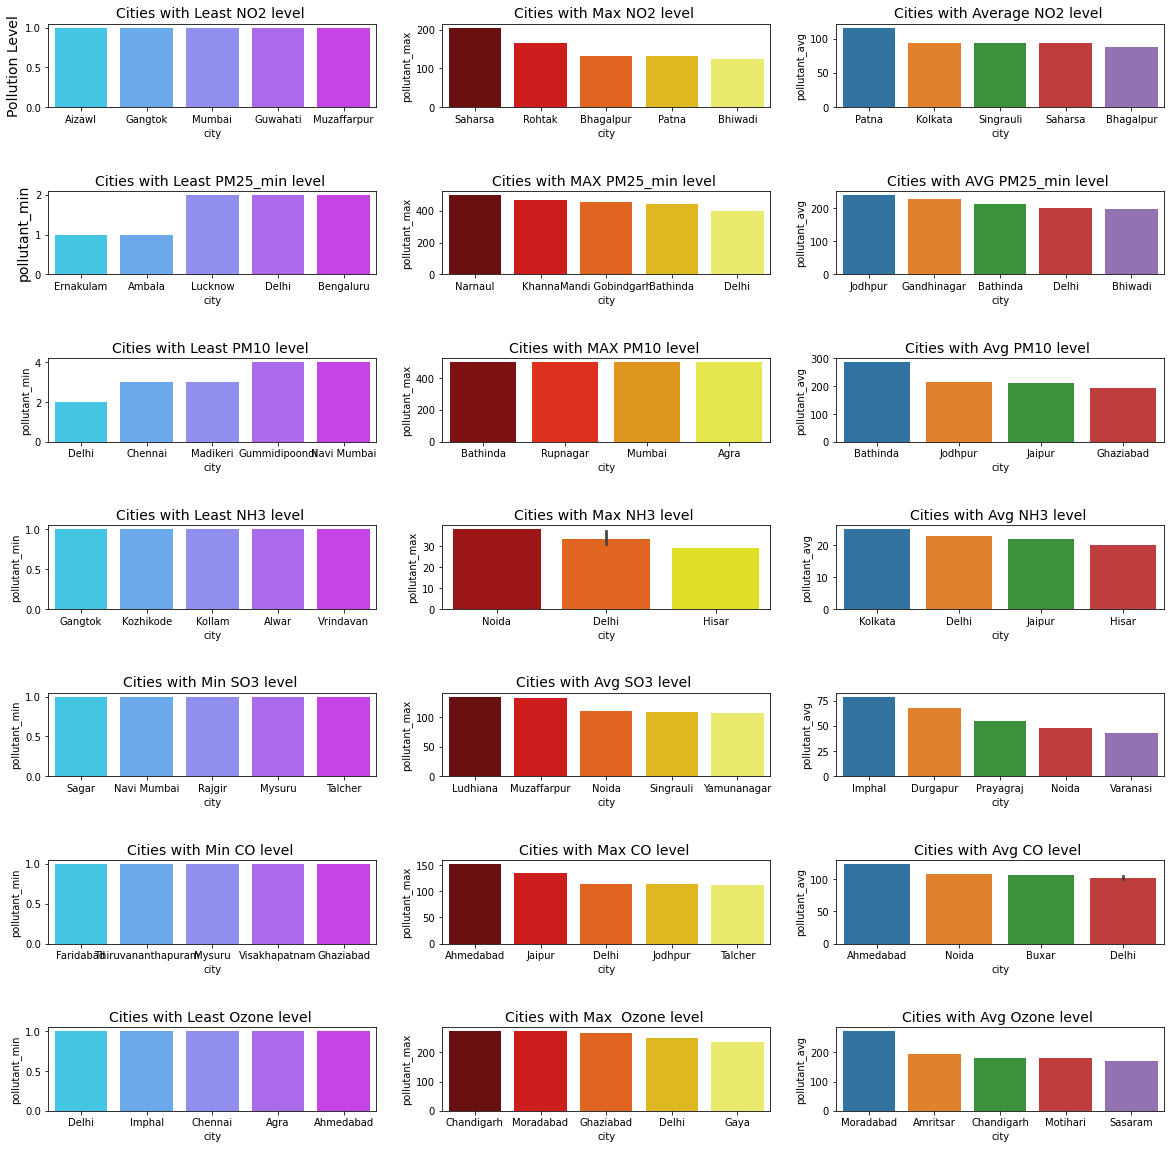

In [30]:
plot_citites_with_min_max_avg_pollution(5)

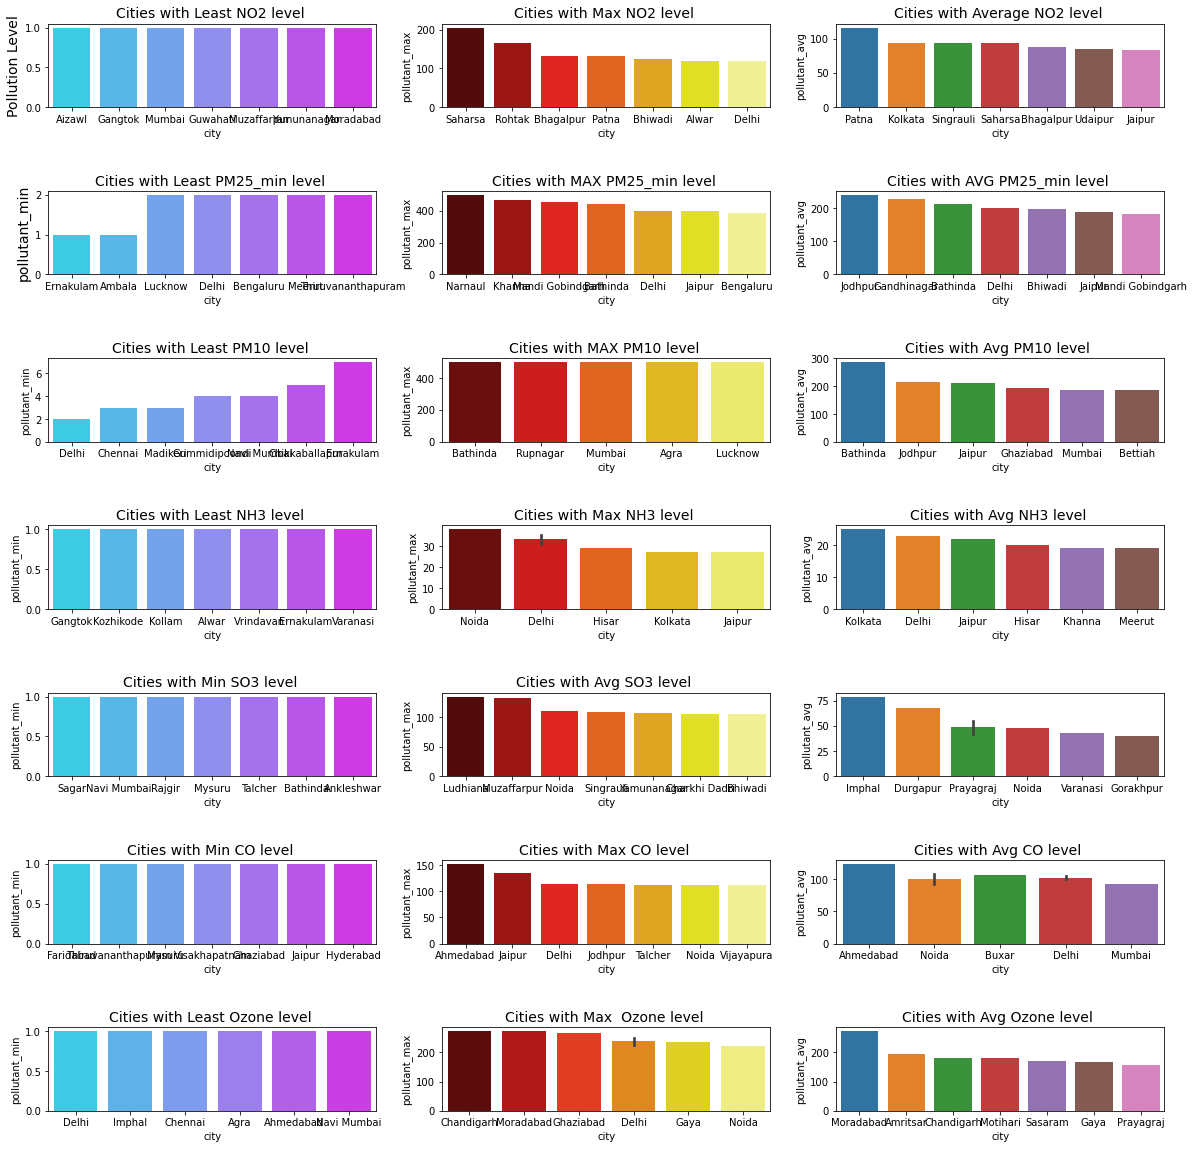

In [31]:
plot_citites_with_min_max_avg_pollution(7)

In [32]:
def boxplot_citites_with_avg_pollution( city = 'Imphal'  ):
    plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(nrows = 1 , ncols = 1 , figsize=(20,20))
    #plt.subplots_adjust(hspace = 1)

    pollutant_avg = ax
    sns.boxplot(ax = pollutant_avg,x = df.pollutant_id , y = df[df.city == city].pollutant_avg)
    pollutant_avg.set_ylabel('Pollution Level ( Avg )' , fontsize = 14)
    pollutant_avg.set_title(f'{city} with various pollutant level (avg)' , fontsize = 14)

    
    plt.show()

<Figure size 720x720 with 0 Axes>

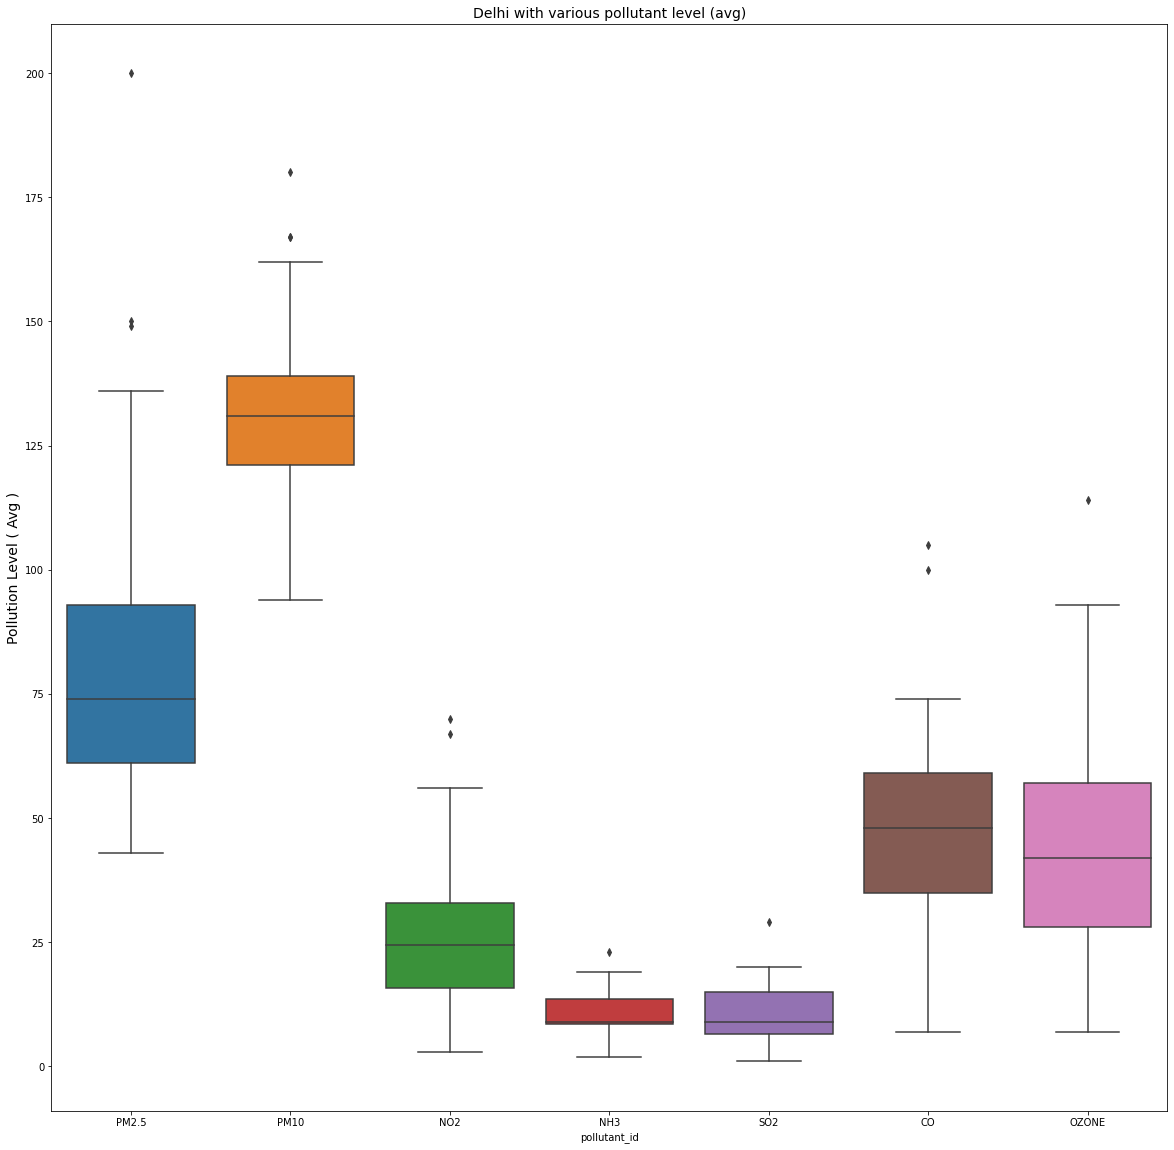

In [33]:
boxplot_citites_with_avg_pollution('Delhi')

<Figure size 720x720 with 0 Axes>

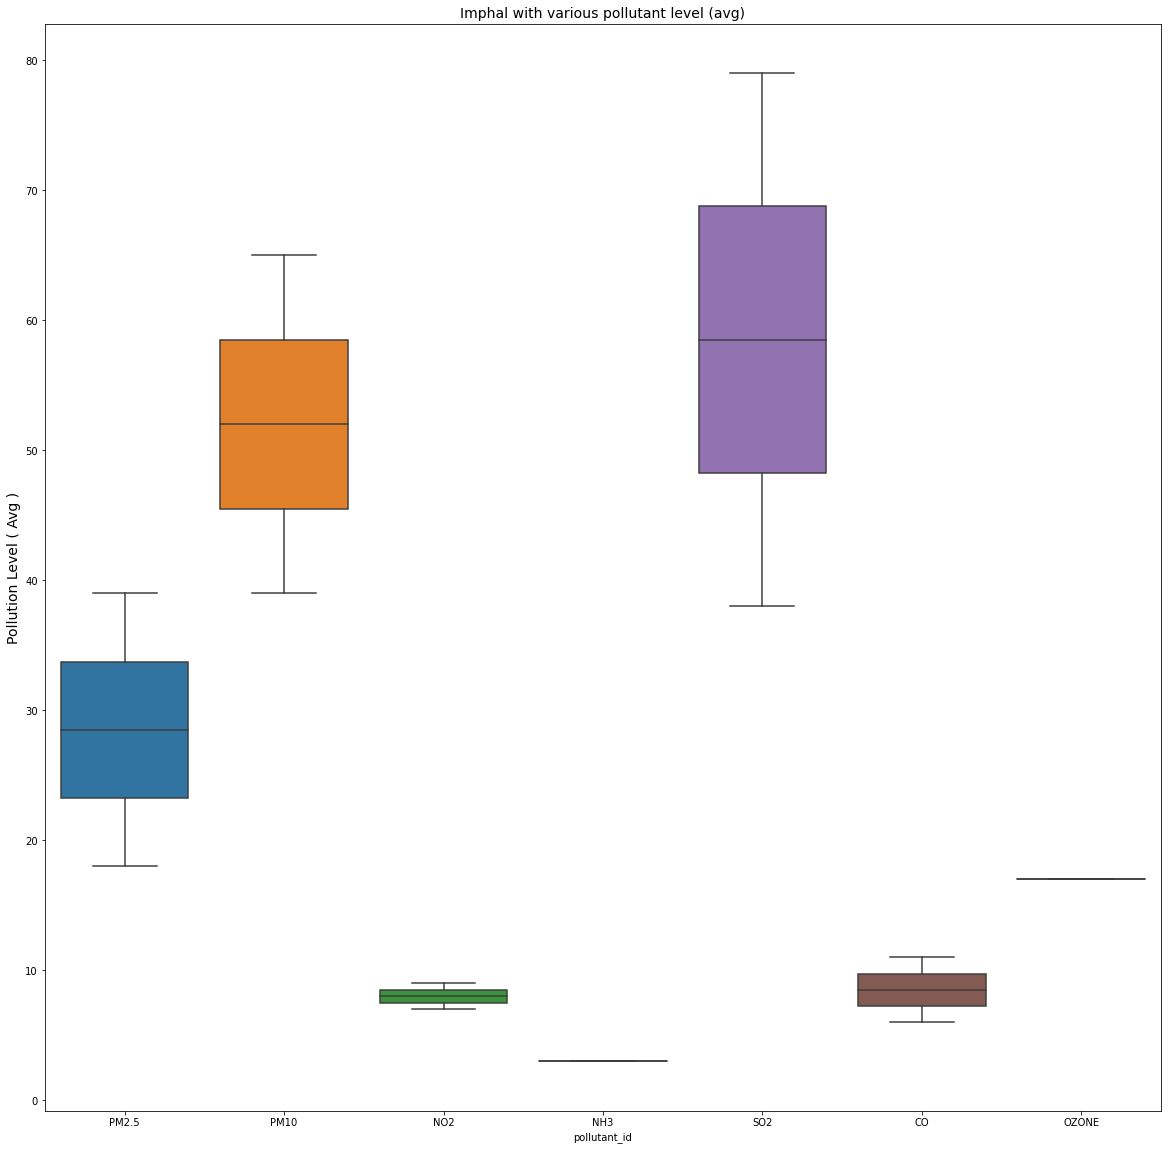

In [34]:
boxplot_citites_with_avg_pollution('Imphal')